In [1]:
import qiskit as qk
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import transpile, assemble
from qiskit.visualization import plot_histogram
from math import pi
from qiskit import *
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit_ibm_runtime import QiskitRuntimeService
import pandas as pd
import numpy as np

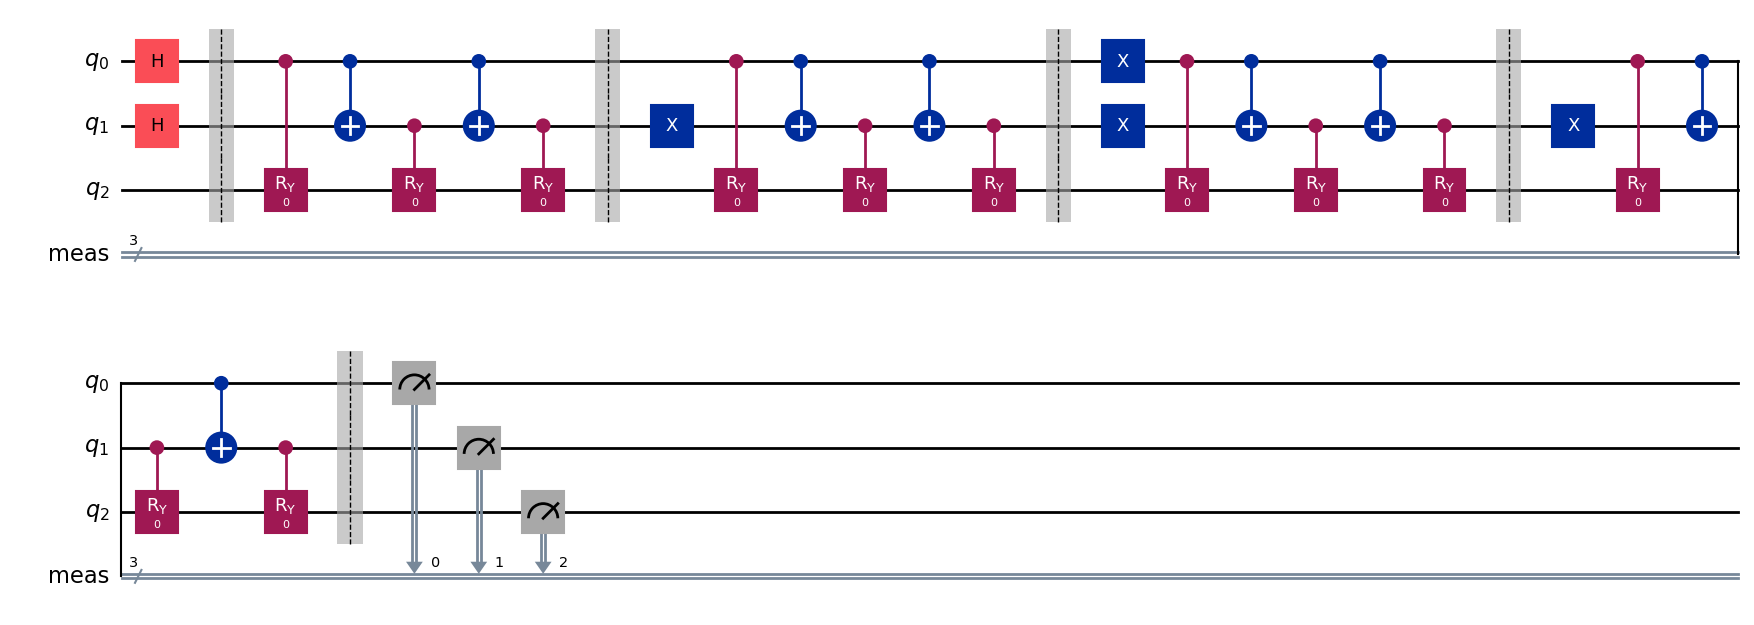

In [14]:
theta = 0
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw('mpl')

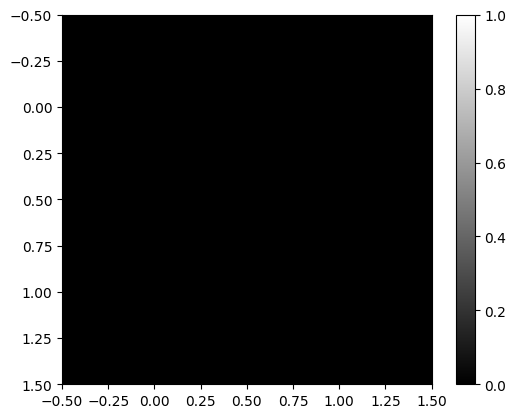

In [15]:
pixels = np.array([[0, 0], [0, 0]])  # For theta=0, all pixels are black
plt.imshow(pixels, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

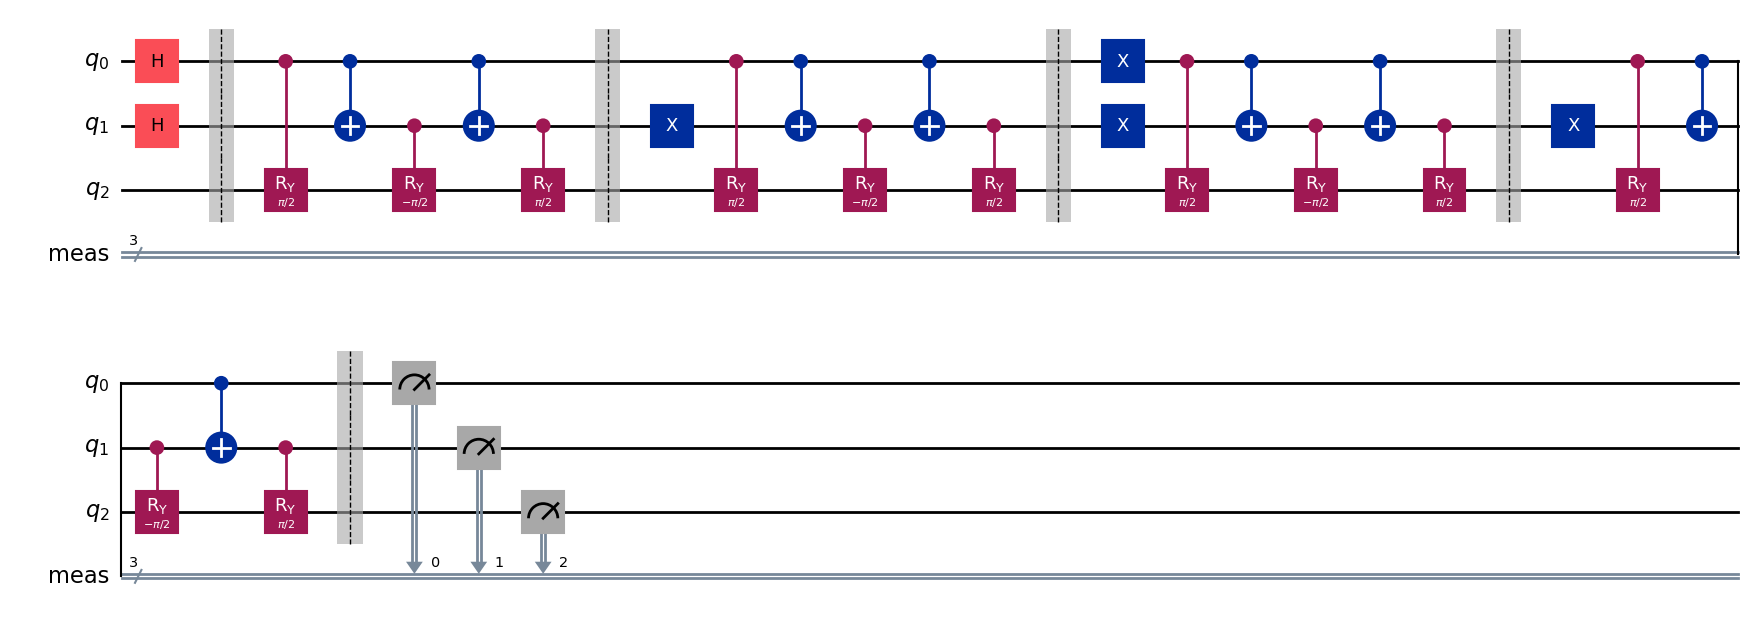

In [16]:
theta = pi/2
qc = QuantumCircuit(3)


qc.h(0)
qc.h(1)

qc.barrier()
#Pixel 1

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()
#Pixel 2

qc.x(1)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.barrier()

qc.x(1)
qc.x(0)
qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)


qc.barrier()

qc.x(1)

qc.cry(theta,0,2)
qc.cx(0,1)
qc.cry(-theta,1,2)
qc.cx(0,1)
qc.cry(theta,1,2)

qc.measure_all()

qc.draw('mpl')

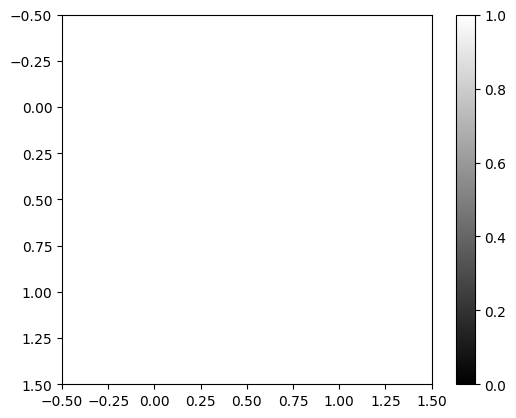

In [17]:
pixels = np.array([[1, 1], [1, 1]])  # For theta=pi/2, all pixels are white
plt.imshow(pixels, cmap='gray', vmin=0, vmax=1)
plt.colorbar()
plt.show()

{'101': 1071, '110': 1046, '100': 979, '111': 1000}


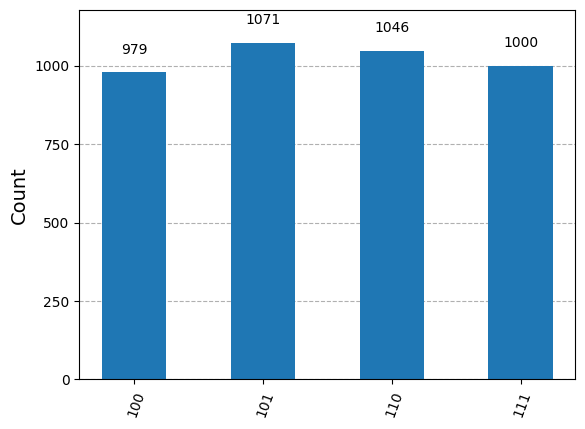

In [18]:
from qiskit_aer import AerProvider, QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit.assembler import assemble_circuits
from qiskit.assembler.run_config import RunConfig


simulator = AerSimulator()
t_qc = transpile(qc, simulator)
result = simulator.run([t_qc], shots=4096, memory=True).result()

# Get the counts from the result
counts = result.get_counts()
print(counts)
plot_histogram(counts)